In [1]:

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
get_ipython().magic(u'matplotlib inline')

from gensim.models.ldamodel import LdaModel
from gensim import corpora,models, similarities
import time

import scipy.sparse as sp

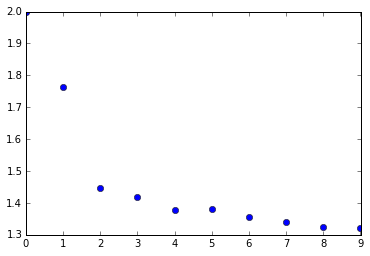

In [2]:
vals = np.loadtxt('run_sraa/vals.txt', dtype= complex)
plt.plot(range(len(vals)) , vals.real , 'o')
plt.show()

In [9]:
corpus = corpora.MmCorpus('run_sraa/all_corpus.mm')
dictionary = corpora.dictionary.Dictionary.load('run_sraa/all_dictionary.dict')
classes = np.loadtxt('run_sraa/all_classes.dat',dtype=int)
model = LdaModel.load('run_sraa/all_sraa.lda_model',mmap='r')

In [11]:

numData = len(corpus)
numFeature = model.num_topics
dataset = pd.DataFrame(np.zeros((numData,numFeature)))
sparse = sp.lil_matrix((numData,numFeature))
i = 0
for data in corpus:
    for t in model[data]:
        sparse[i,t[0]] = t[1]
    i += 1

dataset = pd.DataFrame(sparse.toarray())
Xarray = []
for i in range(4):
    Xarray.append(dataset[classes==i])
# X1 = dataset[classes==0]
# X2 = dataset[classes==1]
# X3 = dataset[classes==2]
# X4 = dataset[classes==3]

In [18]:
from sklearn.svm import LinearSVC

for i in range(4):
    for j in range(i+1,4):
        X = pd.concat([Xarray[i],Xarray[j]])
        Y = np.zeros(X.shape[0],dtype=int)
        Y[:Xarray[i].shape[0]] = np.ones(Xarray[i].shape[0],dtype=int)

        clf = LinearSVC()
        clf.fit(X,Y)
        predict = clf.predict(X)

        print i,j,":",
        print (predict==Y).sum()*1.0/len(predict)


0 1 : 0.95171080437
0 2 : 0.902962272737
0 3 : 0.936485924282
1 2 : 0.955609225117
1 3 : 0.841860293303
2 3 : 0.899130980638


In [15]:
print '''
sraa\realauto.... is created
sraa\realaviation.... is created
sraa\simauto.... is created
sraa\simaviation.... is created
'''


ealauto.... is created
ealaviation.... is created
sraa\simauto.... is created
sraa\simaviation.... is created



In [6]:
corpus = corpora.MmCorpus('run_sraa/sraa1_corpus.mm')
dictionary = corpora.dictionary.Dictionary.load('run_sraa/sraa1_dictionary.dict')
classes = np.loadtxt('run_sraa/sraa1_classes.dat',dtype=int)
model = LdaModel.load('run_sraa/sraa1_sraa.lda_model',mmap='r')

In [7]:
numData = len(corpus)
numFeature = model.num_topics
dataset = pd.DataFrame(np.zeros((numData,numFeature)))
sparse = sp.lil_matrix((numData,numFeature))
i = 0
for data in corpus:
    for t in model[data]:
        sparse[i,t[0]] = t[1]
    i += 1

dataset = pd.DataFrame(sparse.toarray())
X1 = dataset[classes==0]
X2 = dataset[classes==1]

X = pd.concat([X1,X2])
Y = np.zeros(X.shape[0],dtype=int)
Y[:X1.shape[0]] = np.ones(X1.shape[0],dtype=int)

clf = LinearSVC()
clf.fit(X,Y)
predict = clf.predict(X)

print "sraa1:",
print (predict==Y).sum()*1.0/len(predict)

sraa1: 0.891322817775


In [8]:
corpus = corpora.MmCorpus('run_sraa/sraa2_corpus.mm')
dictionary = corpora.dictionary.Dictionary.load('run_sraa/sraa2_dictionary.dict')
classes = np.loadtxt('run_sraa/sraa2_classes.dat',dtype=int)
model = LdaModel.load('run_sraa/sraa2_sraa.lda_model',mmap='r')


numData = len(corpus)
numFeature = model.num_topics
dataset = pd.DataFrame(np.zeros((numData,numFeature)))
sparse = sp.lil_matrix((numData,numFeature))
i = 0
for data in corpus:
    for t in model[data]:
        sparse[i,t[0]] = t[1]
    i += 1


dataset = pd.DataFrame(sparse.toarray())
X1 = dataset[classes==0]
X2 = dataset[classes==1]

X = pd.concat([X1,X2])
Y = np.zeros(X.shape[0],dtype=int)
Y[:X1.shape[0]] = np.ones(X1.shape[0],dtype=int)

clf = LinearSVC()
clf.fit(X,Y)
predict = clf.predict(X)

print "sraa2:",
print (predict==Y).sum()*1.0/len(predict)

sraa2: 0.864782156659
